<a href="https://colab.research.google.com/github/sahinebrar/MachineLearningExercises/blob/main/polynomial_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1-** you are expected to implement polynomial regression for given data, and find the best fitting line with order ($k$) using the method ```LinearRegression``` from the package ```scikit-learn```.

**2-** Show bias-variance trade-off (plot each case) and explain in detail.

**3-** Calculate predicted output for obtained order $k$ using this formula:
 
   - $\large \textbf{w'} = \left(\textbf{X}^{\text{T}} \textbf{X}\right)^{-1} \textbf{X}^{\text{T}} \textbf{y}$

   - $\large \textbf{y'} = \textbf{X}\textbf{w'}$

and compare the results with previous results.

- **Hint:** Use pseudo-inverse of a matrix

In [ ]:
import numpy as np
import scipy.linalg

import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
import operator
from sklearn.metrics import mean_squared_error,r2_score

np.random.seed(seed=21)

# ignore warnings
import warnings
warnings.simplefilter(action = "ignore", category = FutureWarning)
warnings.simplefilter(action = "ignore", category = RuntimeWarning)

In [ ]:
df=pd.read_csv("/Data.csv")
df
x = df.iloc[:,0].to_numpy().reshape((100, 1))
y = df.iloc[:,1].to_numpy().reshape((100, 1))

FileNotFoundError: ignored

RMSE of degree  1 :  371.2962143885946 *** R2 score of degree  1 :  0.3086874685884061
RMSE of degree  2 :  351.2744539159784 *** R2 score of degree  2 :  0.3812338869812101
RMSE of degree  3 :  147.30230293466425 *** R2 score of degree  3 :  0.8911940963671089
RMSE of degree  4 :  147.29683107622708 *** R2 score of degree  4 :  0.8912021798720072
RMSE of degree  5 :  91.78051817835916 *** R2 score of degree  5 :  0.9577589799250404
RMSE of degree  6 :  91.75680538650766 *** R2 score of degree  6 :  0.957780804232442
RMSE of degree  7 :  91.6856562570072 *** R2 score of degree  7 :  0.9578462532071204
RMSE of degree  8 :  91.66650869526707 *** R2 score of degree  8 :  0.9578638580805725
RMSE of degree  9 :  91.64860071994644 *** R2 score of degree  9 :  0.9578803199114773
RMSE of degree  10 :  91.62807343837093 *** R2 score of degree  10 :  0.9578991855722779


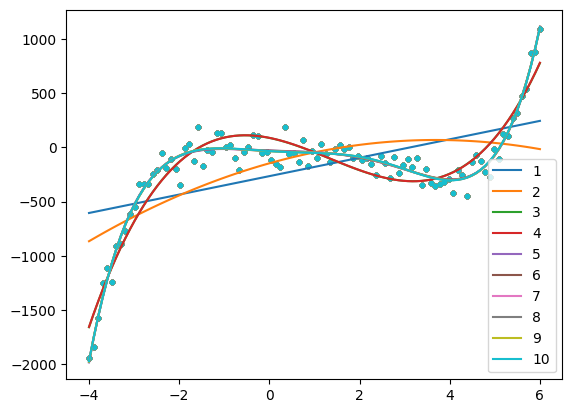

In [ ]:
for degree in range(1,11):
  polynomial_features = PolynomialFeatures(degree=degree)
  x_poly = polynomial_features.fit_transform(x)

  model = LinearRegression()
  model.fit(x_poly, y)
  y_poly_pred = model.predict(x_poly)

  rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
  r2 = r2_score(y,y_poly_pred)
  print("RMSE of degree ", degree ,": ",rmse, "*** R2 score of degree ", degree, ": ", r2)

  plt.scatter(x, y, s=10)
  # sort the values of x before line plot
  sort_axis = operator.itemgetter(0)
  sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
  x, y_poly_pred = zip(*sorted_zip)
  plt.plot(x, y_poly_pred, label= degree)
plt.legend()
plt.show()


RMSE değeri, modelin veriye ne kadar uyduğunu gösterir. RMSE değeri, ne kadar düşük olursa modelin veriye uygunluğu o kadar fazladır. R2 değeri ise gözlemlenen verinin regresyon modeli ile kadar açıklanabildiğini gösterir.


Polinominal regresyonun uygulanması sonucu derece 1 ila 10 arasında arttırılarak RMSE ve R2 değerleri elde edilmiştir. Derece arttıkça RMSE değerlerinin azaldığı gözükmektedir. Derece 5'e kadar RMSE değeri*(RMSE of degree  5 :  91.78051817835916*) gözle görülür bir biçimde düşme eğilimindeyken derece 5'ten sonra bu eğilim yavaşlamıştır. Aynı yorumlar R2*(R2 score of degree  5 :  0.9577589799250404)* değeri için de geçerlidir. R2 değeri ne kadar yüksek olursa modelin açıklanabilirliği o kadar iyidir. Derece 5'ten sonraki dereceler modele önemli ölçüde katkı sağlamamıştır. Bu sebeple polinominal derecesi olarak 5 iyi bir seçim olarak gözükmektedir.  

Bu yorumları yaparken derece arttıkça modelin karmaşıklığının arttığı ve overfit durumuna sebep olacağı göz önünde bulundurulmuştur. 

In [ ]:
polynomial_features = PolynomialFeatures(degree=1)
x_poly = polynomial_features.fit_transform(x)
model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)
plt.scatter(x, y, s=10)
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x, y_poly_pred, label= degree)
plt.title("Underfit, High Bias, Low Variance")
plt.xlabel('Figür 1', fontsize=12)
plt.show()

NameError: ignored

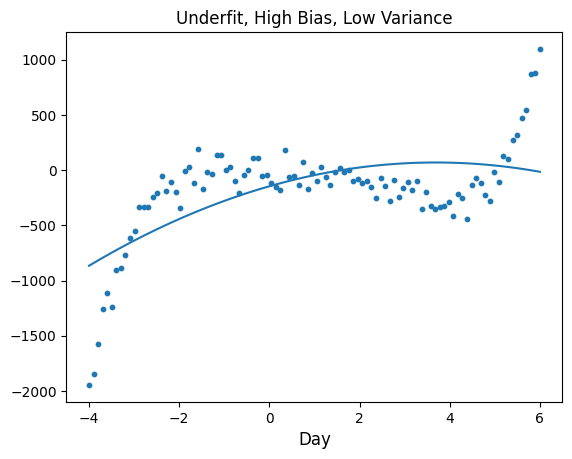

In [ ]:
polynomial_features = PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(x)
model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)
plt.scatter(x, y, s=10)
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x, y_poly_pred, label= degree)
plt.title("Underfit, High Bias, Low Variance")
plt.xlabel('Figür 2', fontsize=12)
plt.show()

**Underfit, High Bias, Low Variance**

Figür 1 ve Figür 2' de "high bias" vardır. Bunun anlamı kullanılan model çok basittir ve verinin karmaşıklığını yakalamamaktadır. Bu durum "underfit"e sebebiyet verir. Bu yüzden model eğitim verisine uyum sağlayamaz ve yeni gelecek verileri de iyi bir şekilde genelleyemez. "High Bias" istenmeyen bir durumdur.

Düşük varyans ise eğitim verisindeki gürültüye karşı hassas olmama durumuna denir. Bir diğer anlamı ise eğitim verisindeki ufak değişikliklerden çok da etkilenmemesi durumudur. Düşük varyans bir model için istenen bir özelliktir.

Sonuç olarak "Underfit, High Bias, Low Variance" durumu modelin basit, verinin karmaşıklığını yakalayamama durumudur. Böyle bir model, doğru değerlerden çok uzak tahminler yapar ve hem eğitim hem de test verilerinde düşük performans gösterir. 

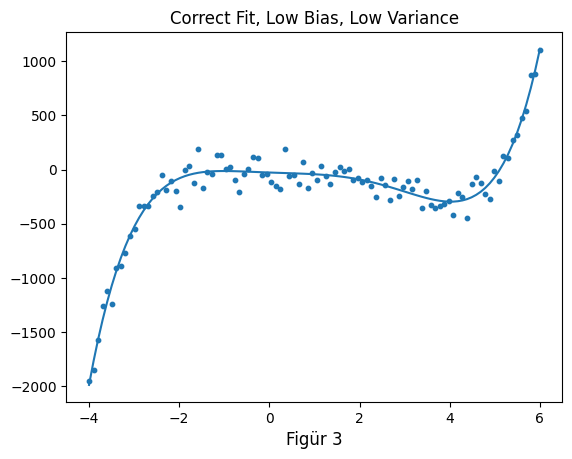

In [ ]:
polynomial_features = PolynomialFeatures(degree=5)
x_poly = polynomial_features.fit_transform(x)
model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)
plt.scatter(x, y, s=10)
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x, y_poly_pred, label= degree)
plt.title("Correct Fit, Low Bias, Low Variance")
plt.xlabel('Figür 3', fontsize=12)
plt.show()

**Correct Fit, Low Bias, Low Variance**

"Low Bias" ve düşük varyanslı "Current Fit" modeller, verideki patterni overfitting veya underfittinge uğramadan bulur. 

"Low Bias", modelin çok fazla tahmin yapmadan hedef değişken ile featurelar arasındaki ilişkiyi doğru bir şekilde yakalayabildiği anlamına gelir.

Düşük varyans ise eğitim verisindeki gürültüye karşı hassas olmama durumuna denir. Bir diğer anlamı ise eğitim verisindeki ufak değişikliklerden çok da etkilenmemesi durumudur. Gelecek yeni veriyi iyi bir şekilde geneller.

Sonuç olarak Figür 3'teki gibi "Low Bias, Düşük Varyans" durumu tüm mpdeller tarafından hedeflenir. Figür 3 bize veriyi iyi bir şekilde genellediğini, aynı zamanda gürültüye karşı hassas olmadığını ve yeni verileri iyi bir şekilde genelleyebileceğini göstermektedir.

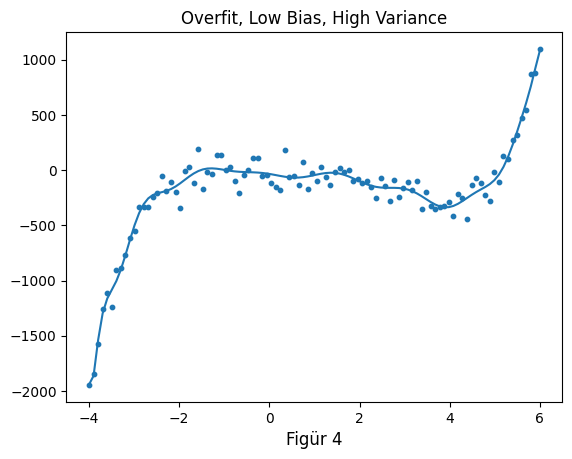

In [ ]:
polynomial_features = PolynomialFeatures(degree=19)
x_poly = polynomial_features.fit_transform(x)
model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)
plt.scatter(x, y, s=10)
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x, y_poly_pred, label= degree)
plt.title("Overfit, Low Bias, High Variance")
plt.xlabel('Figür 4', fontsize=12)
plt.show()

**Overfit, Low Bias, High Variance**

Bir model veriyi overfit ediyorsa bu durum eğitim verisinde çok iyi performans gösterdiğini fakat yeni verilere karşı da iyi olmadığını göstermektedir.

"Low Bias", eğitim verisinde çok az hata yaparak çalıştığını gösterir. Fakat yüksek varyans bize modelin eğitim verilerine çok yakın uyarlandığını ve yeni verileri hiç de iyi genellemediğini anlatır. Bu durum test verisinde çokça hataya neden olur.

Figür 4 bu durum için örnek gösterilebilir. Model, problem için çok karmaşıktır. Hem gürültüden hem de eğitim verisinden öğrenme işlemi gerçekleşir. Sonuç olarak yeni gelecek verileri iyi bir şekilde genelleyemez ve hatta "High Bias, Düşük Varyans"a sahip Figür 1 ve Figür 2'deki  bir modelden daha da kötü sonuç verebilir.